In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import ensemble
from sklearn import model_selection
from sklearn import multiclass
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from scipy.stats import chi2_contingency
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
# sns.set(style="pastel") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline    
%config InlineBackend.figure_format = 'retina' 
from matplotlib import rcParams
config = {
    "font.family": 'serif', # 衬线字体
    "font.size": 7.5, # 相当于六号大小
    "font.serif": ['SimSun'], # 宋体
    "mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)

In [8]:
import pandas as pd
df = pd.read_excel(r"D:\原始数据.xlsx")
df

Group       住院号 Male/female  Age(y)  BMI (kg/m2)  \
0    No infection group  50447856      female      74        21.24   
1    No infection group  50435810      female      49        24.56   
2    No infection group    454735        male      61        26.85   
3    No infection group    473109      female      67        28.11   
4    No infection group    477046      female      59        21.38   
..                  ...       ...         ...     ...          ...   
262  No infection group    452265        male      74        26.76   
263  No infection group  50415051        male      57        21.89   
264  No infection group    486048        male      73        21.44   
265  No infection group    480404      female      59        25.04   
266  No infection group    468239        male      59        22.09   

    Hypertension Diabetes mellitus Hyperlipidemia Anemia Hypoalbuminemia  ...  \
0              N                 N              N      N               N  ...   
1              Y                 N              N      N               N  ...   
2              Y                 N              N      N               Y  ...   
3              Y                 N              Y      N               N  ...   
4              Y                 N              Y      N               Y  ...   
..           ...               ...            ...    ...             ...  ...   
262            Y                 N              N      N               N  ...   
263            Y                 N              N      N               N  ...   
264            Y                 N              N      N               N  ...   
265            Y                 N              N      N               Y  ...   
266            Y                 N              N      N               N  ...   

    White blood cell count (×109 ·L-1)  Platelet count (×109 ·L-1)  \
0                                 10.0                          12   
1                                  8.0                          94   
2                                  8.0                         222   
3                                 10.0                         166   
4                                  9.0                         181   
..                                 ...                         ...   
262                                8.0                         280   
263                                9.0                         272   
264                                7.0                         288   
265                                8.0                         220   
266                                9.0                         274   

     Red blood cell count(×109 ·L-1)  Creatinine (μmol·L-1)  \
0                                1.8                     12   
1                                2.5                     18   
2                                4.1                     32   
3                                3.5                     25   
4                                3.6                     29   
..                               ...                    ...   
262                              4.8                     40   
263                              4.7                     38   
264                              5.1                     42   
265                              3.9                     32   
266                              4.7                     39   

     Alanine aminotransferase (U ·L-1)  Aspartate aminotransferase(U ·L-1)  \
0                                    1                                   3   
1                                    1                                   6   
2                                   18                                   3   
3                                   18                                  14   
4                                   18                                  15   
..                                 ...                                 ...   
262                                 26                      

In [9]:
df = df.drop("住院号",axis = 1)

In [10]:
df

Group Male/female  Age(y)  BMI (kg/m2) Hypertension  \
0    No infection group      female      74        21.24            N   
1    No infection group      female      49        24.56            Y   
2    No infection group        male      61        26.85            Y   
3    No infection group      female      67        28.11            Y   
4    No infection group      female      59        21.38            Y   
..                  ...         ...     ...          ...          ...   
262  No infection group        male      74        26.76            Y   
263  No infection group        male      57        21.89            Y   
264  No infection group        male      73        21.44            Y   
265  No infection group      female      59        25.04            Y   
266  No infection group        male      59        22.09            Y   

    Diabetes mellitus Hyperlipidemia Anemia Hypoalbuminemia  \
0                   N              N      N               N   
1                   N              N      N               N   
2                   N              N      N               Y   
3                   N              Y      N               N   
4                   N              Y      N               Y   
..                ...            ...    ...             ...   
262                 N              N      N               N   
263                 N              N      N               N   
264                 N              N      N               N   
265                 N              N      N               Y   
266                 N              N      N               N   

               Type of fracture  ...  White blood cell count (×109 ·L-1)  \
0         Femoral neck fracture  ...                                10.0   
1    Intertrochanteric fracture  ...                                 8.0   
2    Intertrochanteric fracture  ...                                 8.0   
3    Intertrochanteric fracture  ...                                10.0   
4    Intertrochanteric fracture  ...                                 9.0   
..                          ...  ...                                 ...   
262       Femoral neck fracture  ...                                 8.0   
263       Femoral neck fracture  ...                                 9.0   
264       Femoral neck fracture  ...                                 7.0   
265  Intertrochanteric fracture  ...                                 8.0   
266       Femoral neck fracture  ...                                 9.0   

     Platelet count (×109 ·L-1)  Red blood cell count(×109 ·L-1)  \
0                            12                              1.8   
1                            94                              2.5   
2                           222                              4.1   
3                           166                              3.5   
4                           181                              3.6   
..                          ...                              ...   
262                         280                              4.8   
263                         272                              4.7   
264                         288                              5.1   
265                         220                              3.9   
266                         274                              4.7   

     Creatinine (μmol·L-1)  Alanine aminotransferase (U ·L-1)  \
0                       12                                  1   
1                       18                                  1   
2                       32                                 18   
3                       25                                 18   
4                       29                                 18   
..                     ...                                ...   
262                     40                                 26   
263                     38                                 24   
264                     42                                 27   
265 

In [11]:
df['Group'] = df['Group'].map({'No infection group': 0, 'Infection group': 1})
df

Group Male/female  Age(y)  BMI (kg/m2) Hypertension Diabetes mellitus  \
0        0      female      74        21.24            N                 N   
1        0      female      49        24.56            Y                 N   
2        0        male      61        26.85            Y                 N   
3        0      female      67        28.11            Y                 N   
4        0      female      59        21.38            Y                 N   
..     ...         ...     ...          ...          ...               ...   
262      0        male      74        26.76            Y                 N   
263      0        male      57        21.89            Y                 N   
264      0        male      73        21.44            Y                 N   
265      0      female      59        25.04            Y                 N   
266      0        male      59        22.09            Y                 N   

    Hyperlipidemia Anemia Hypoalbuminemia            Type of fracture  ...  \
0                N      N               N       Femoral neck fracture  ...   
1                N      N               N  Intertrochanteric fracture  ...   
2                N      N               Y  Intertrochanteric fracture  ...   
3                Y      N               N  Intertrochanteric fracture  ...   
4                Y      N               Y  Intertrochanteric fracture  ...   
..             ...    ...             ...                         ...  ...   
262              N      N               N       Femoral neck fracture  ...   
263              N      N               N       Femoral neck fracture  ...   
264              N      N               N       Femoral neck fracture  ...   
265              N      N               Y  Intertrochanteric fracture  ...   
266              N      N               N       Femoral neck fracture  ...   

     White blood cell count (×109 ·L-1)  Platelet count (×109 ·L-1)  \
0                                  10.0                          12   
1                                   8.0                          94   
2                                   8.0                         222   
3                                  10.0                         166   
4                                   9.0                         181   
..                                  ...                         ...   
262                                 8.0                         280   
263                                 9.0                         272   
264                                 7.0                         288   
265                                 8.0                         220   
266                                 9.0                         274   

     Red blood cell count(×109 ·L-1)  Creatinine (μmol·L-1)  \
0                                1.8                     12   
1                                2.5                     18   
2                                4.1                     32   
3                                3.5                     25   
4                                3.6                     29   
..                               ...                    ...   
262                              4.8                     40   
263                              4.7                     38   
264                              5.1                     42   
265                              3.9                     32   
266                              4.7                     39   

     Alanine aminotransferase (U ·L-1)  Aspartate aminotransferase(U ·L-1)  \
0                                    1                                   3   
1                                    1                                   6   
2                                   18                                   3   
3                                   18                                  14   
4                                   18                                  15   
..                                 ...               

In [12]:
df.columns

Index(['Group', 'Male/female', 'Age(y)', 'BMI (kg/m2)', 'Hypertension',
       'Diabetes mellitus', 'Hyperlipidemia', 'Anemia', 'Hypoalbuminemia',
       'Type of fracture', 'Preoperative oxygen saturation(%)',
       'White blood cell count (×109 ·L-1)', 'Platelet count (×109 ·L-1)',
       'Red blood cell count(×109 ·L-1)', 'Creatinine (μmol·L-1)',
       'Alanine aminotransferase (U ·L-1)',
       'Aspartate aminotransferase(U ·L-1)', 'Anesthesia method',
       'Duration of surgery(min)', 'Estimated blood loss during surgery(ml)',
       'Gram-positive bacteria'],
      dtype='object')

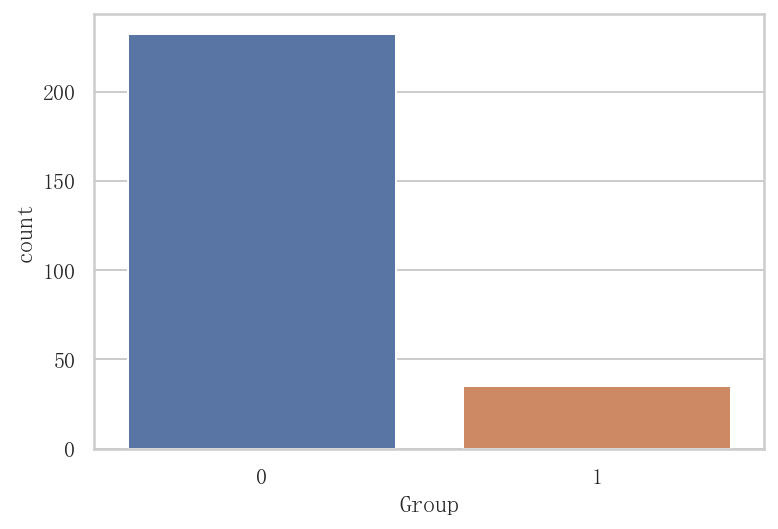

In [13]:
sns.countplot(x = df['Group'])

In [14]:
df = df.drop('Gram-positive bacteria',axis = 1)

In [15]:
target_col = 'Group'
cat_features = ['Male/female',  'Hypertension',
       'Diabetes mellitus', 'Hyperlipidemia', 'Anemia', 'Hypoalbuminemia',
       'Type of fracture', 'Anesthesia method']
num_features = [col for col in df.columns if col not in cat_features and col != target_col]

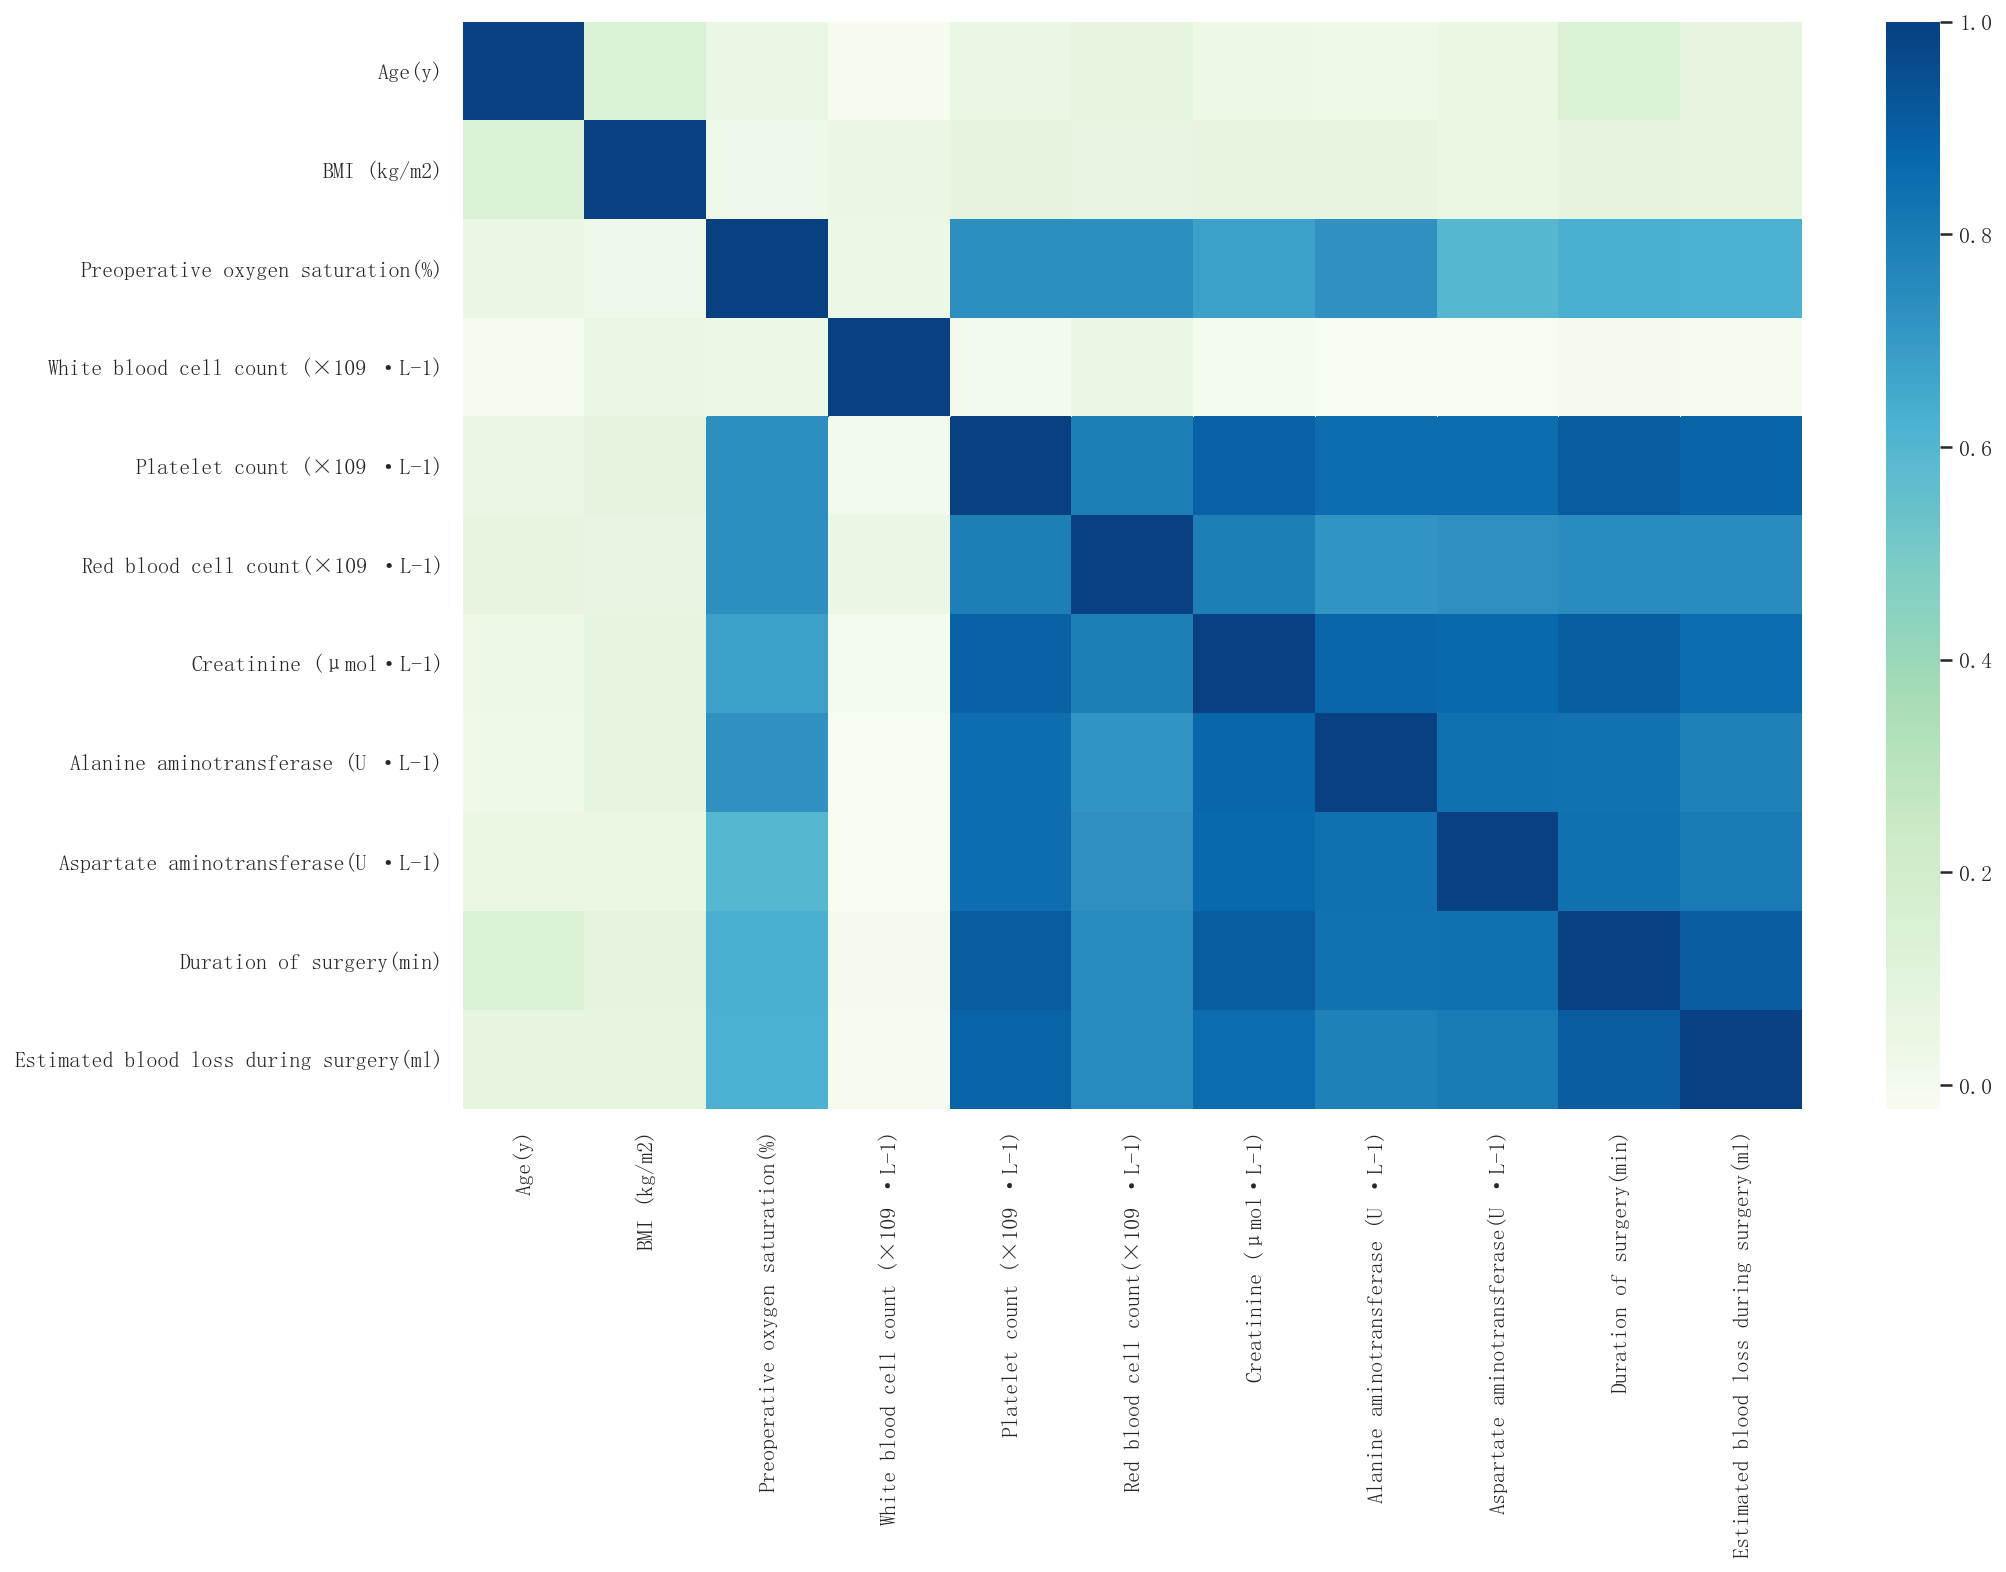

In [16]:
corr = df[num_features].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap = 'GnBu')

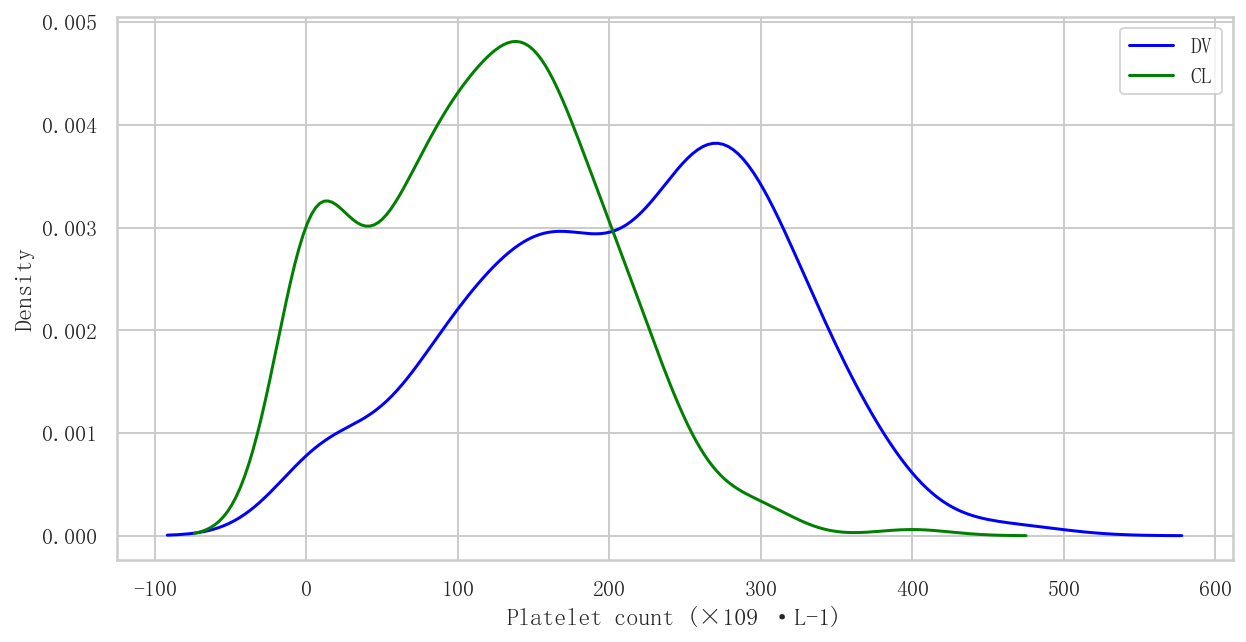

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Platelet count (×109 ·L-1)'], color = 'blue', label = 'DV')
sns.kdeplot(df['Duration of surgery(min)'], color = 'green', label = 'CL')
plt.legend()

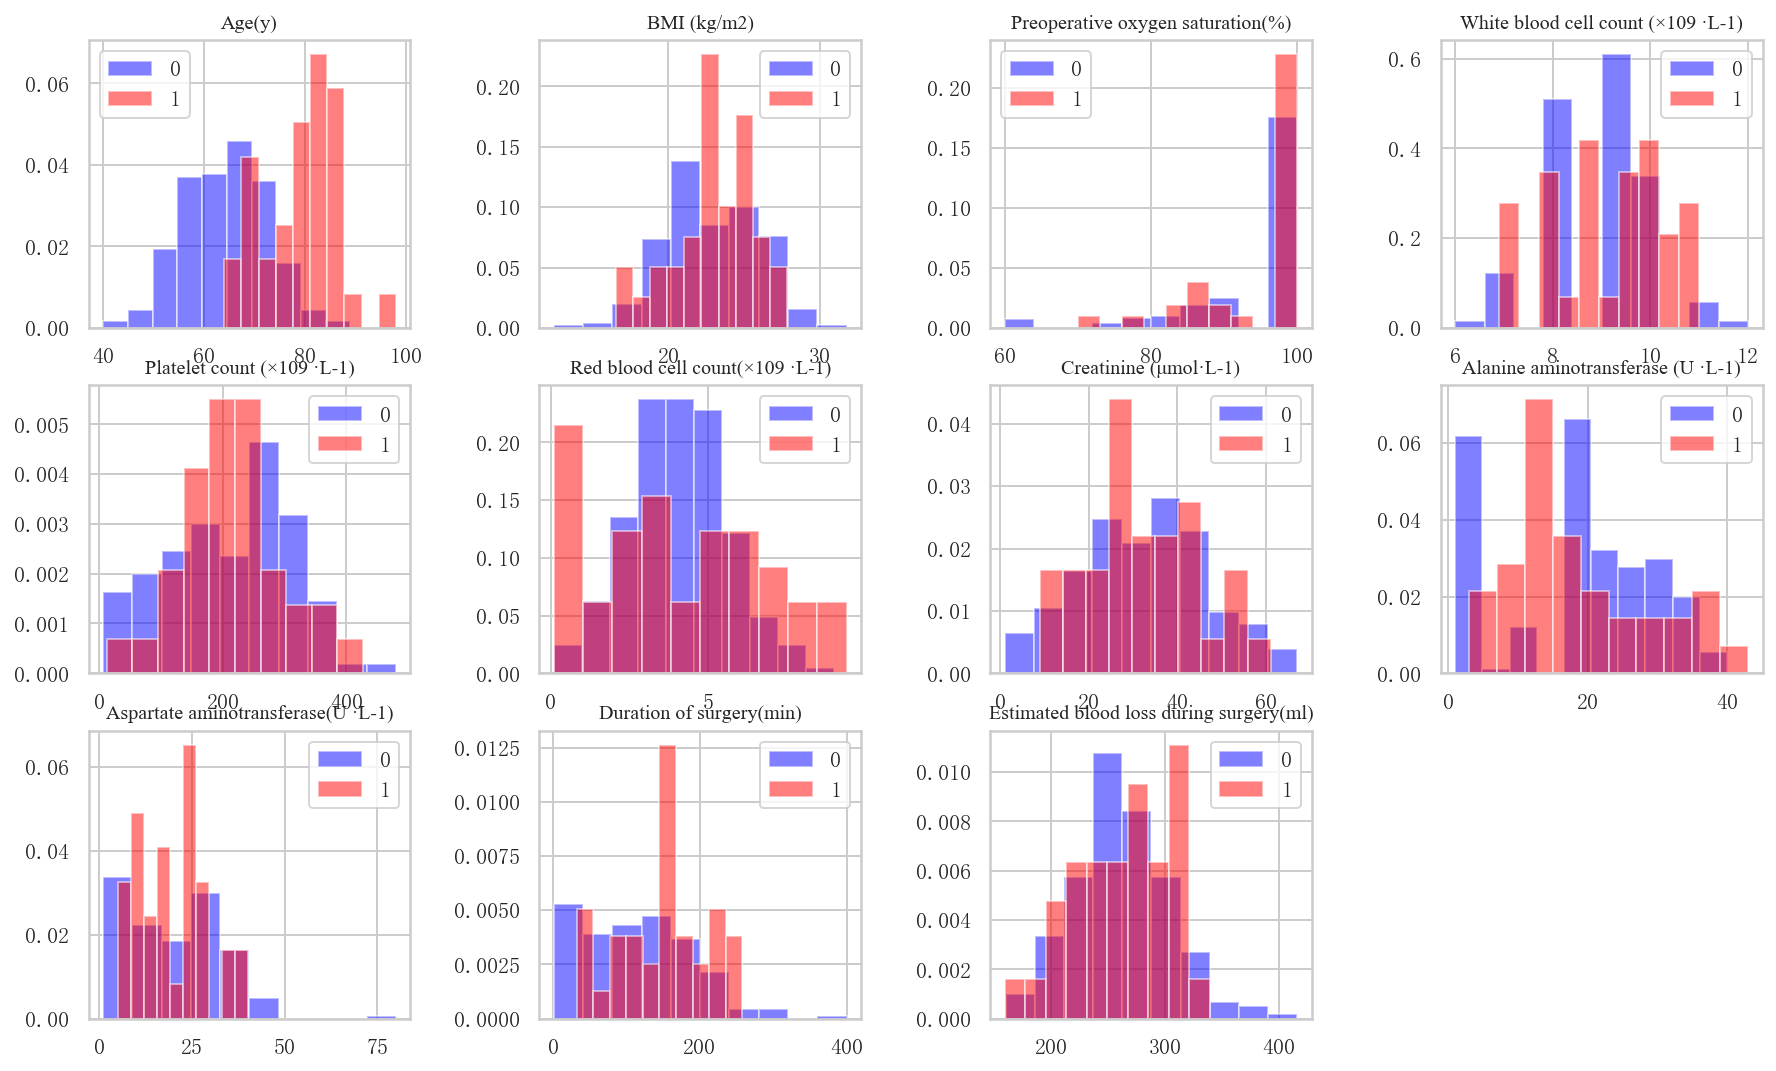

In [19]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15,9))
i=1
for col in num_features:
    ax=fig.add_subplot(3,4,i)
    ax.hist(df.loc[df[target_col] == 0, col], density=True, color='blue', label='0', alpha=0.5)
    ax.hist(df.loc[df[target_col] == 1, col], density=True, color='red', label='1', alpha=0.5)
    i=i+1
    #ax.set_xlabel(col)
    plt.title(col, fontweight='bold', fontfamily='Times New Roman', fontsize=10)
    ax.legend()
    

plt.subplots_adjust(wspace=0.4)
plt.show()

In [29]:
df.columns

Index(['Group', 'Male/female', 'Age(y)', 'BMI (kg/m2)', 'Hypertension',
       'Diabetes mellitus', 'Hyperlipidemia', 'Anemia', 'Hypoalbuminemia',
       'Type of fracture', 'Preoperative oxygen saturation(%)',
       'White blood cell count (×109 ·L-1)', 'Platelet count (×109 ·L-1)',
       'Red blood cell count(×109 ·L-1)', 'Creatinine (μmol·L-1)',
       'Alanine aminotransferase (U ·L-1)',
       'Aspartate aminotransferase(U ·L-1)', 'Anesthesia method',
       'Duration of surgery(min)', 'Estimated blood loss during surgery(ml)'],
      dtype='object')

In [49]:
y=df['Group']
X = df.drop("Group",axis = 1)

In [50]:
X_trans=pd.get_dummies(X,columns=cat_features)

In [32]:
from sklearn.linear_model import LassoCV
import pandas as pd
from sklearn.linear_model import Lasso



# 使用LassoCV选择特征
lasso = LassoCV(cv=5)
lasso.fit(X_trans, y)

# 输出选择的特征
selected_features = X_trans.columns[lasso.coef_ != 0]
print("Selected features:", list(selected_features))

Selected features: ['Age(y)', 'BMI (kg/m2)', 'Preoperative oxygen saturation(%)', 'White blood cell count (×109 ·L-1)', 'Platelet count (×109 ·L-1)', 'Red blood cell count(×109 ·L-1)', 'Creatinine (μmol·L-1)', 'Alanine aminotransferase (U ·L-1)', 'Aspartate aminotransferase(U ·L-1)', 'Duration of surgery(min)', 'Estimated blood loss during surgery(ml)', 'Hypertension_N', 'Hypertension_Y', 'Hyperlipidemia_N', 'Hyperlipidemia_Y', 'Anemia_N', 'Anemia_Y', 'Hypoalbuminemia_N', 'Hypoalbuminemia_Y', 'Type of fracture_Femoral neck fracture', 'Type of fracture_Intertrochanteric fracture', 'Anesthesia method_General anesthesia', 'Anesthesia method_Lumbar anesthesia ']


In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=42)

In [33]:
X=X_trans[['Age(y)', 'BMI (kg/m2)', 'Preoperative oxygen saturation(%)', 'White blood cell count (×109 ·L-1)', 'Platelet count (×109 ·L-1)', 'Red blood cell count(×109 ·L-1)', 'Creatinine (μmol·L-1)', 'Alanine aminotransferase (U ·L-1)', 'Aspartate aminotransferase(U ·L-1)', 'Duration of surgery(min)', 'Estimated blood loss during surgery(ml)', 'Hypertension_N', 'Hypertension_Y', 'Hyperlipidemia_N', 'Hyperlipidemia_Y', 'Anemia_N', 'Anemia_Y', 'Hypoalbuminemia_N', 'Hypoalbuminemia_Y', 'Type of fracture_Femoral neck fracture', 'Type of fracture_Intertrochanteric fracture', 'Anesthesia method_General anesthesia', 'Anesthesia method_Lumbar anesthesia ']]

In [22]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [23]:
%%time
clf_rf_4 = lgb.LGBMClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='roc_auc')   #5-fold cross-validation
rfecv = rfecv.fit(X_trans, y)

Wall time: 4.09 s


In [24]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_trans.columns[rfecv.support_])

Optimal number of features : 9
Best features : Index(['Age(y)', 'BMI (kg/m2)', 'Platelet count (×109 ·L-1)',
       'Red blood cell count(×109 ·L-1)', 'Alanine aminotransferase (U ·L-1)',
       'Aspartate aminotransferase(U ·L-1)', 'Duration of surgery(min)',
       'Anemia_N', 'Anesthesia method_General anesthesia'],
      dtype='object')


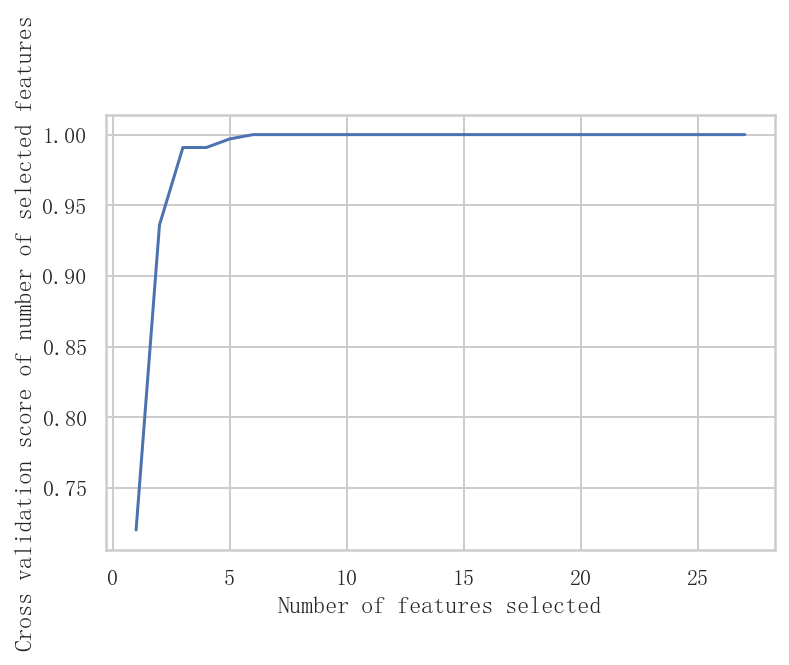

In [25]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_.T[0])
plt.show()

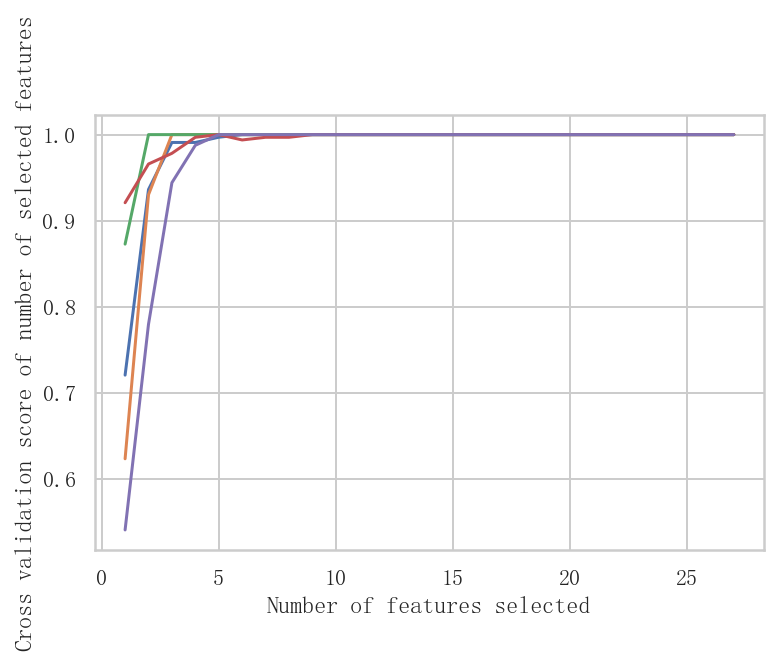

In [26]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [51]:
X = X_trans[['Age(y)', 'BMI (kg/m2)', 'Platelet count (×109 ·L-1)',
       'Red blood cell count(×109 ·L-1)', 'Alanine aminotransferase (U ·L-1)',
       'Aspartate aminotransferase(U ·L-1)', 'Duration of surgery(min)',
       'Anemia_N', 'Anesthesia method_General anesthesia']]

In [43]:
import numpy as np
import optuna

import lightgbm as lgb
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(xtrain,ytrain, random_state=42)
def objective(trial):
    
    
    dtrain = lgb.Dataset(train_x, label=train_y)
    dvalid = lgb.Dataset(valid_x, label=valid_y)

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "auc")
    gbm = lgb.train(param, dtrain, valid_sets=[dvalid], callbacks=[pruning_callback])
    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    auc = sklearn.metrics.roc_auc_score(valid_y, pred_labels)
    return auc

if __name__ == "__main__":
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
    )
    study.optimize(objective, n_trials=50)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-08-01 10:03:27,304] A new study created in memory with name: no-name-8cde65ef-e9b4-4959-b91c-59522959b2ce
[I 2023-08-01 10:03:27,359] Trial 0 finished with value: 0.7142857142857143 and parameters: {'lambda_l1': 1.2955045311090385e-08, 'lambda_l2': 0.0009344710387643251, 'num_leaves': 30, 'feature_fraction': 0.8015523144667894, 'bagging_fraction': 0.5087817253827923, 'bagging_freq': 3, 'min_child_samples': 27}. Best is trial 0 with value: 0.7142857142857143.
[I 2023-08-01 10:03:27,421] Trial 1 finished with value: 0.845514950166113 and parameters: {'lambda_l1': 0.04226099831389723, 'lambda_l2': 8.745771725322011e-08, 'num_leaves': 132, 'feature_fraction': 0.7634284922354243, 'bagging_fraction': 0.7146062200369836, 'bagging_freq': 6, 'min_child_samples': 24}. Best is trial 1 with value: 0.845514950166113.
[I 2023-08-01 10:03:27,486] Trial 2 finished with value: 0.7857142857142857 and parameters: {'lambda_l1': 1.4449844321513087e-05, 'lambda_l2': 0.03967213325118061, 'num_leaves'

[I 2023-08-01 10:03:31,800] Trial 47 finished with value: 0.9285714285714286 and parameters: {'lambda_l1': 0.0009729920302829093, 'lambda_l2': 0.026184940855089784, 'num_leaves': 191, 'feature_fraction': 0.878648789323631, 'bagging_fraction': 0.9461342050411343, 'bagging_freq': 5, 'min_child_samples': 9}. Best is trial 12 with value: 1.0.
[I 2023-08-01 10:03:31,893] Trial 48 pruned. Trial was pruned at iteration 16.
[I 2023-08-01 10:03:31,976] Trial 49 pruned. Trial was pruned at iteration 10.


Number of finished trials: 50
Best trial:
  Value: 1.0
  Params: 
    lambda_l1: 0.04002241138030372
    lambda_l2: 4.5175176083433115
    num_leaves: 193
    feature_fraction: 0.9822590559054953
    bagging_fraction: 0.6869414501130756
    bagging_freq: 6
    min_child_samples: 12


In [45]:
from sklearn import metrics
model = lgb.LGBMClassifier(**study.best_params)
model.fit(train_x,train_y)
y_pred = model.predict(xtest)
metrics.roc_auc_score(ytest,y_pred)

[LightGBM] [Warning] feature_fraction is set=0.9822590559054953, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9822590559054953
[LightGBM] [Warning] lambda_l1 is set=0.04002241138030372, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04002241138030372
[LightGBM] [Warning] bagging_fraction is set=0.6869414501130756, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6869414501130756
[LightGBM] [Warning] lambda_l2 is set=4.5175176083433115, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5175176083433115
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


0.9444444444444444

In [50]:
train_x

Age(y)  BMI (kg/m2)  Preoperative oxygen saturation(%)  \
68       61        21.67                                100   
217      75        25.22                                100   
159      74        26.58                                100   
55       54        23.53                                100   
186      60        28.20                                100   
..      ...          ...                                ...   
20       67        23.91                                 89   
188      63        17.64                                100   
71       72        25.58                                100   
106      67        27.26                                100   
102      70        21.53                                100   

     White blood cell count (×109 ·L-1)  Platelet count (×109 ·L-1)  \
68                                  9.0                         249   
217                                 8.0                         347   
159                                12.0                         453   
55                                  8.0                         223   
186                                 9.0                         327   
..                                  ...                         ...   
20                                  9.0                         138   
188                                 9.0                         346   
71                                  8.0                         339   
106                                10.0                         211   
102                                10.0                         375   

     Red blood cell count(×109 ·L-1)  Creatinine (μmol·L-1)  \
68                               4.4                     35   
217                              6.4                     55   
159                              7.9                     66   
55                               4.1                     33   
186                              6.0                     50   
..                               ...                    ...   
20                               3.1                     22   
188                              6.3                     55   
71                               6.2                     53   
106                              3.9                     31   
102                              7.0                     58   

     Alanine aminotransferase (U ·L-1)  Aspartate aminotransferase(U ·L-1)  \
68                                  21                                  23   
217                                 36                                  39   
159                                 31                                  45   
55                                  18                                  21   
186                                 32                                  35   
..                                 ...                                 ...   
20                                  11                                  11   
188                                 35                                  38   
71                                  35                                  37   
106                                 18                                   1   
102                                 37                                  42   

     Duration of surgery(min)  ...  Hyperlipidemia_N  Hyperlipidemia_Y  \
68                        127  ...                 1                 0   
217                       227  ...                 1                 0   
159                       306  ...                 1                 0   
55                        110  ...                 1                 0   
186                       205  ...                 1                 0   
..                        ...  ...               ...               ...   
20                         62  ...                 0                 1   
188                       218  ...                 1                 0   
71                        214  ... 

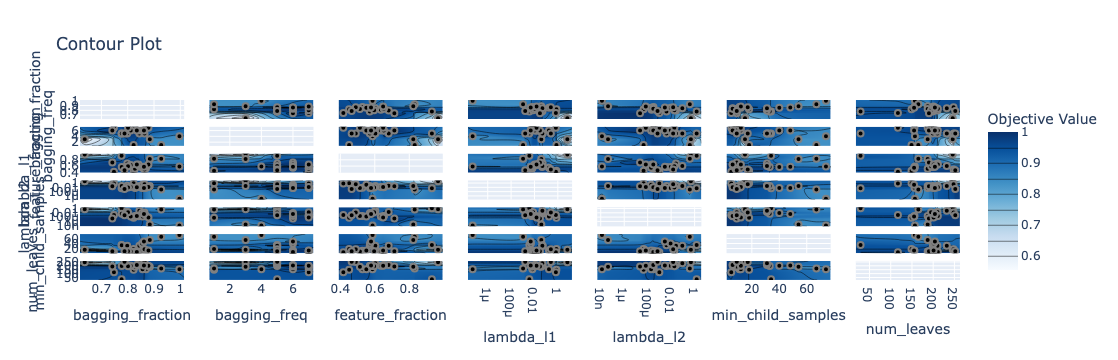

In [47]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_parallel_coordinate
fig1=optuna.visualization.plot_contour(study)
fig1.show()

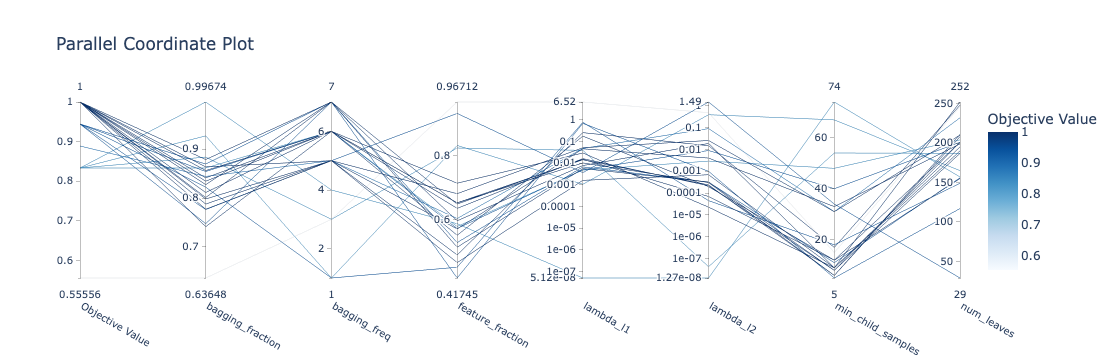

In [48]:
fig2=optuna.visualization.plot_parallel_coordinate(study)
fig2.show()

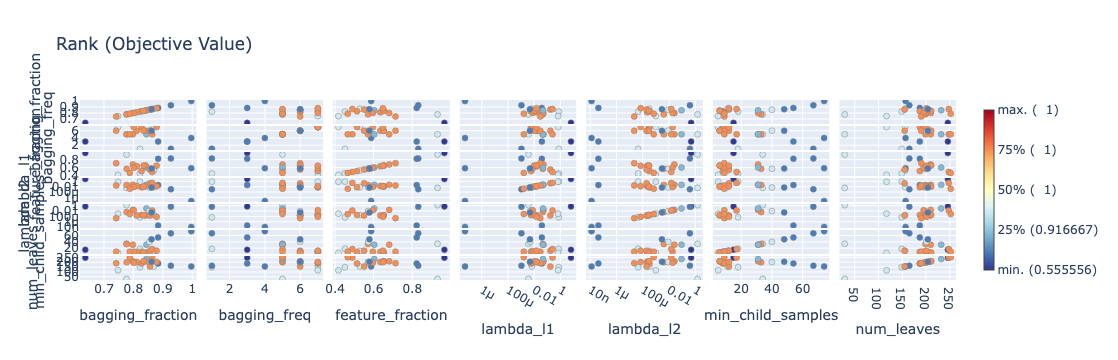

In [49]:
import optuna
fig3=optuna.visualization.plot_rank(study)
fig3.show()

In [54]:
study.best_params

{'lambda_l1': 0.04550765756305805,
 'lambda_l2': 0.004000918609168951,
 'num_leaves': 199,
 'feature_fraction': 0.5708205780194965,
 'bagging_fraction': 0.7771795660873411,
 'bagging_freq': 5,
 'min_child_samples': 33}

In [80]:
from sklearn.ensemble import ExtraTreesRegressor
import shap
pd.DataFrame(xtrain)
model1 = lgb.LGBMClassifier(**study.best_params).fit(train_x, train_y)
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(train_x)  # 传入特征矩阵X，计算SHAP值

[LightGBM] [Warning] feature_fraction is set=0.5708205780194965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5708205780194965
[LightGBM] [Warning] lambda_l1 is set=0.04550765756305805, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04550765756305805
[LightGBM] [Warning] bagging_fraction is set=0.7771795660873411, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7771795660873411
[LightGBM] [Warning] lambda_l2 is set=0.004000918609168951, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004000918609168951
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [88]:
explainer.expected_value

-3.630735321490942

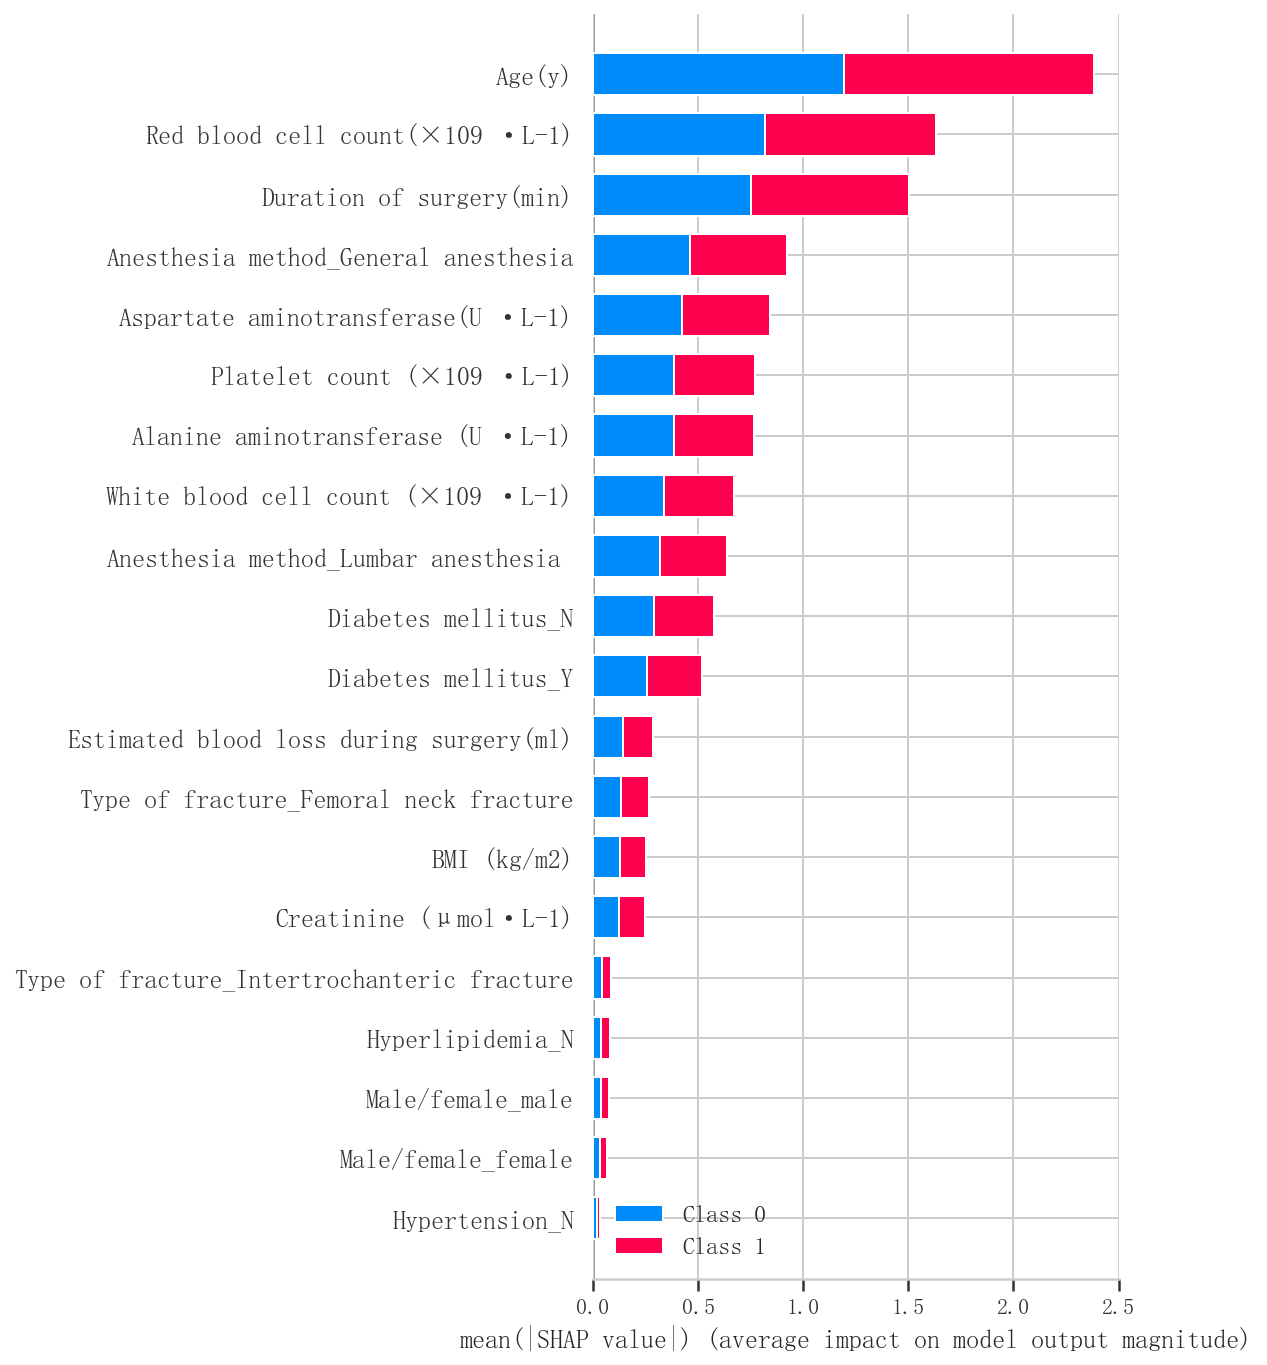

In [82]:
shap.summary_plot(shap_values, train_x)

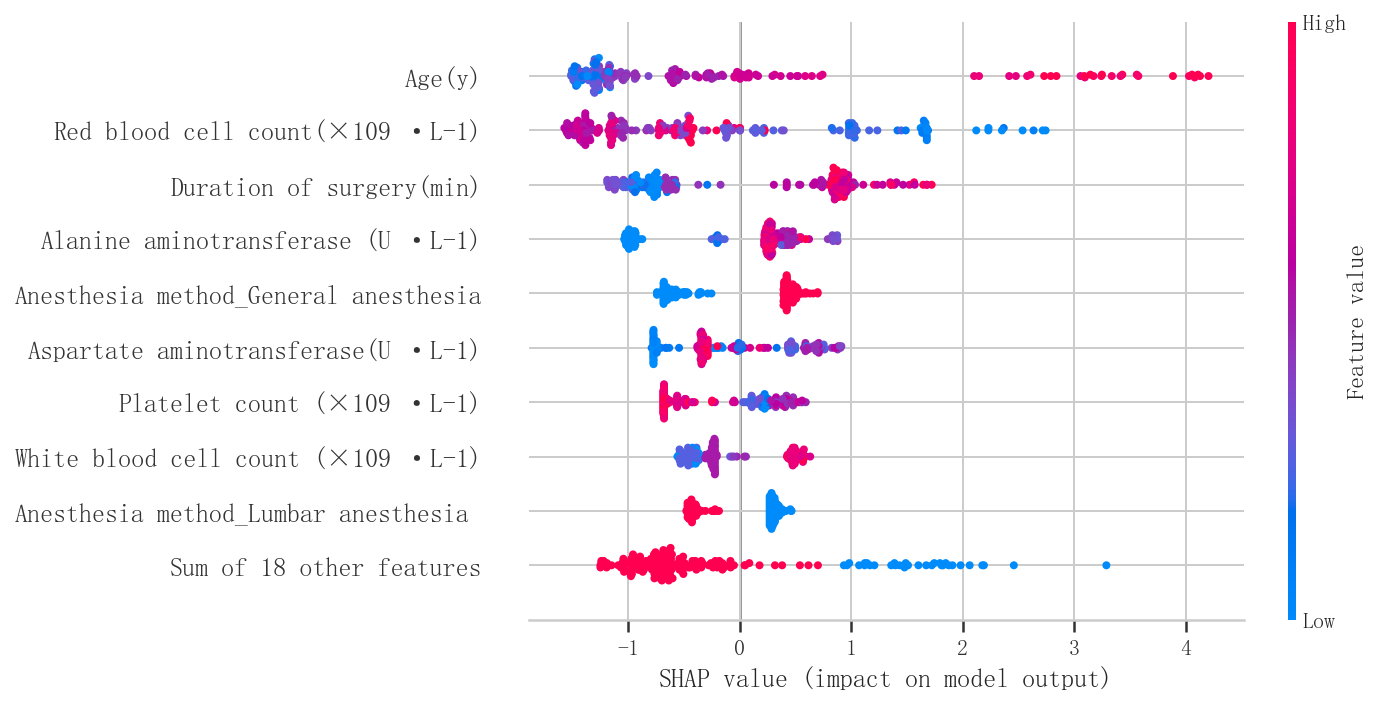

In [83]:
check_additivity=False
explainer = shap.Explainer(model1, train_x)
shap_values = explainer(train_x,check_additivity=False)
shap.plots.beeswarm(shap_values)

In [67]:
len(shap_values)

200

In [68]:
explainer.expected_value

-3.630735321490942

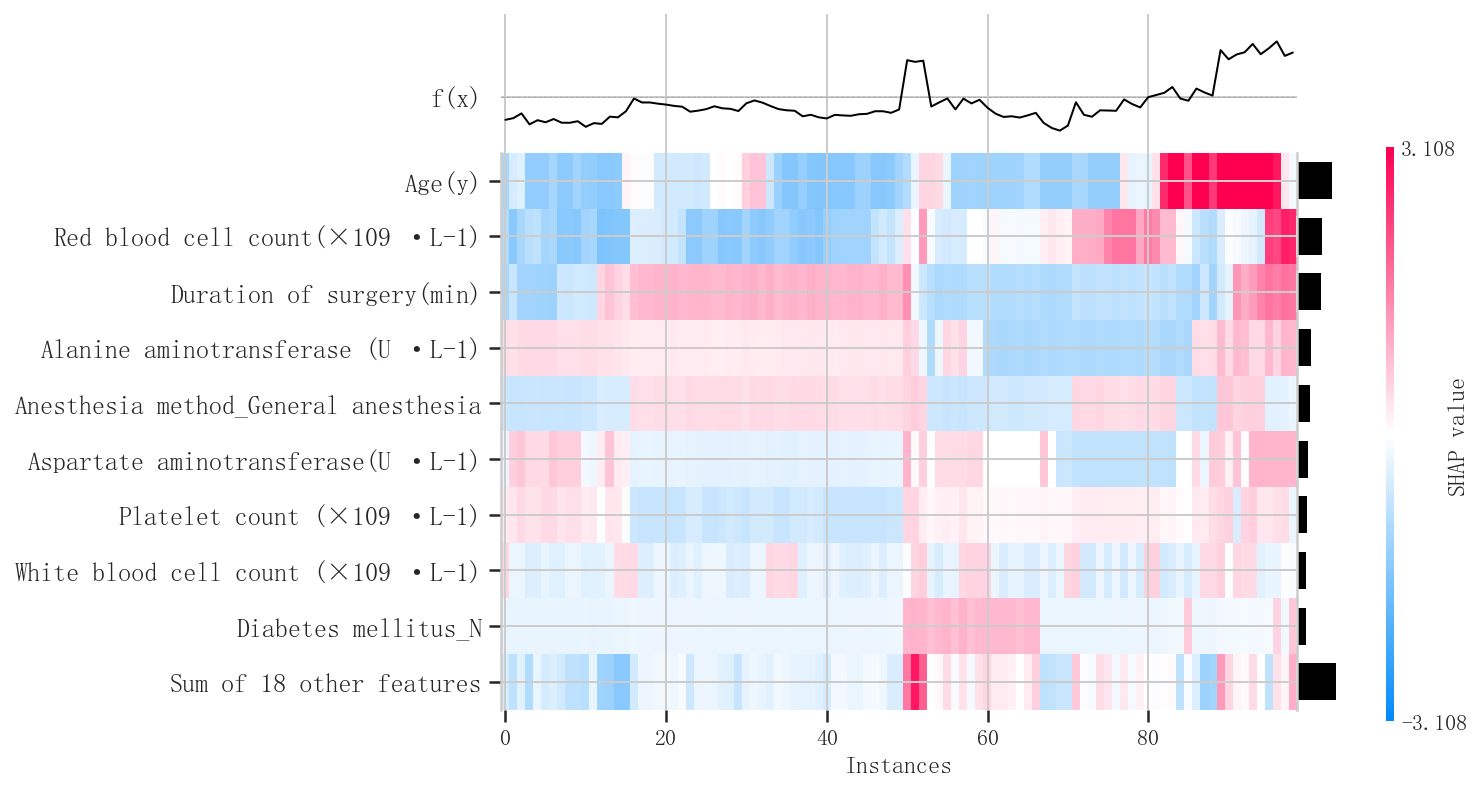

In [84]:
shap.plots.heatmap(shap_values[1:100])

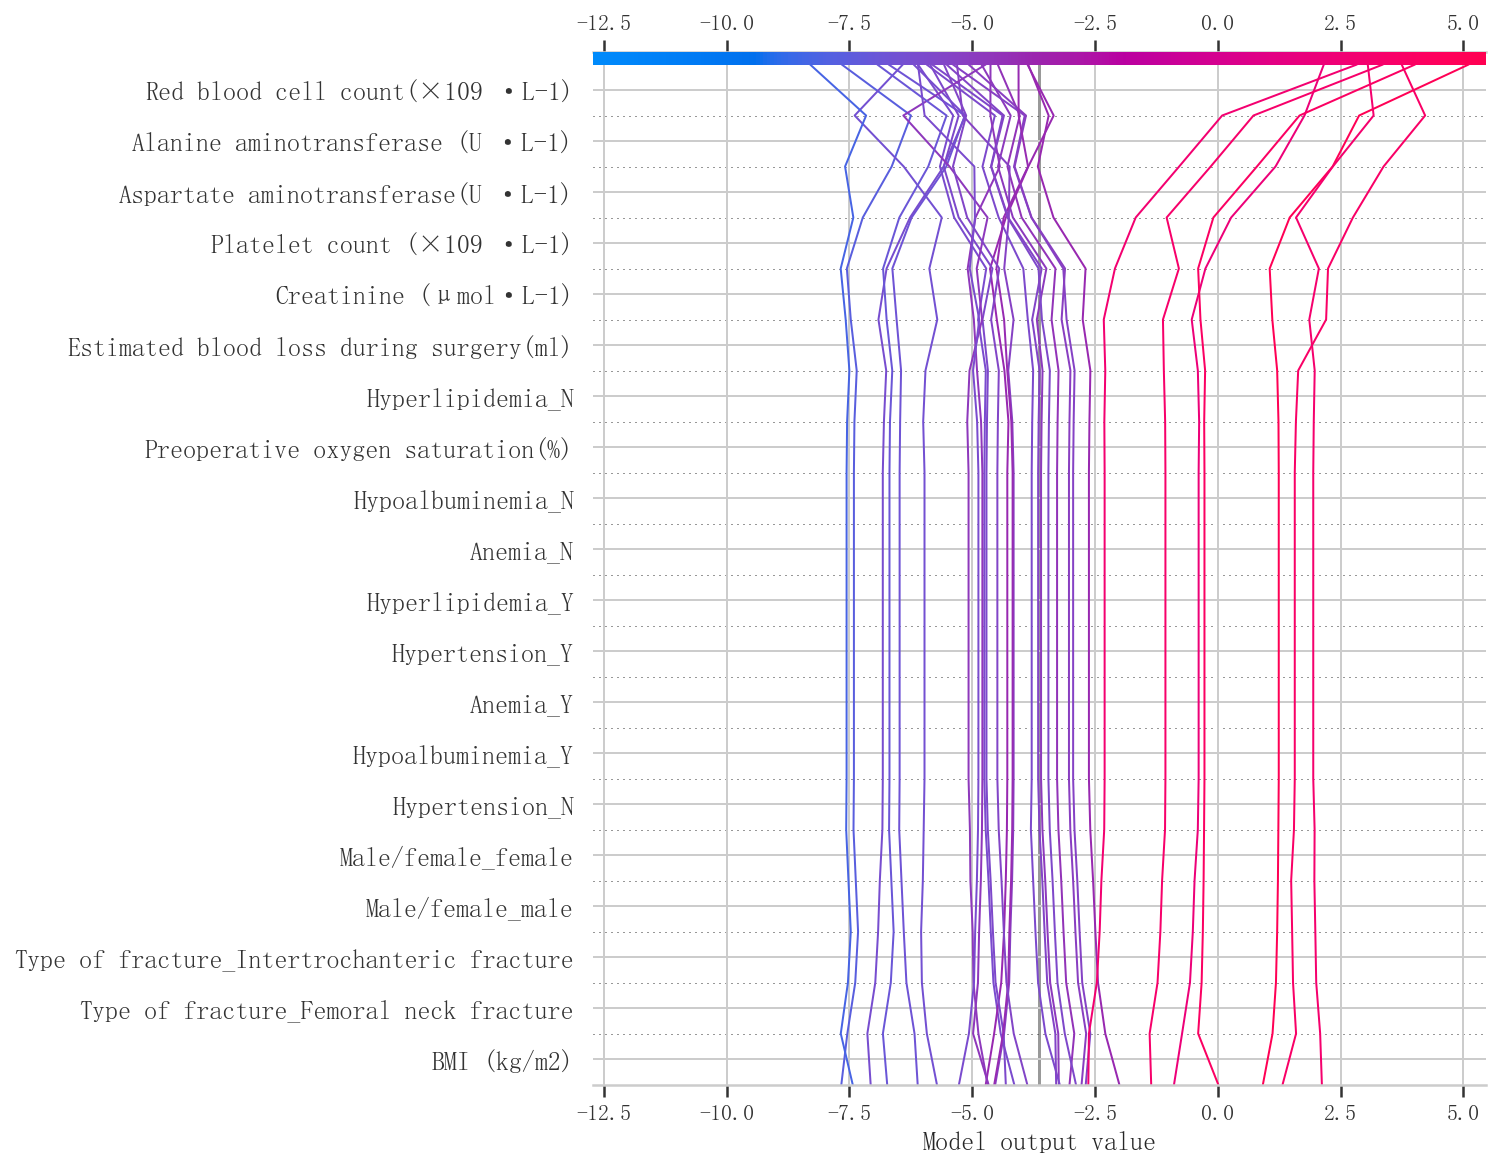

In [92]:
features = train_x[:30] # 只分析前20个样本
shap_values = explainer.shap_values(features)
shap.decision_plot(explainer.expected_value, shap_values, 
                   features, feature_order='hclust')

In [101]:
train_y = pd.DataFrame(train_y)
valid_y = pd.DataFrame(valid_y)
train_x.to_csv("xtrain.csv",index=False)
train_y.to_csv("ytrain.csv",index=False)
valid_x.to_csv("xtest.csv",index=False)
valid_y.to_csv("ytest.csv",index=False)